In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [13]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

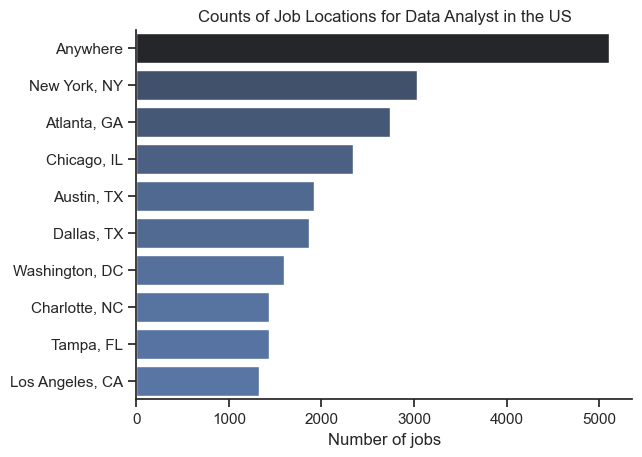

In [19]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,y='job_location',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

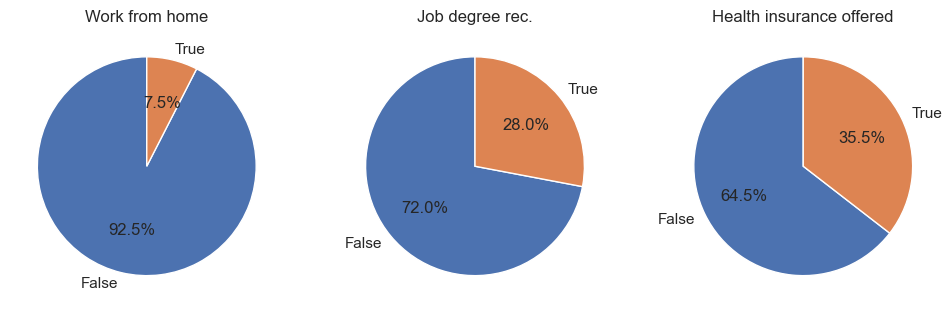

In [21]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home': 'Work from home',
    'job_no_degree_mention': 'Job degree rec.',
    'job_health_insurance': 'Health insurance offered'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle=90,autopct='%1.1f%%',labels=['False','True'])
    ax[i].set_title(title)


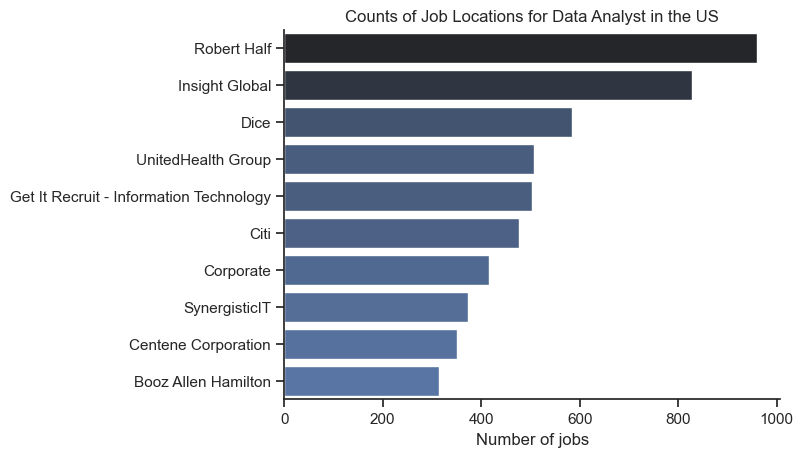

In [23]:
df_company_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_company_plot,y='company_name',x='count',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()